In [21]:
import pandas as pd
import numpy as np
from matplotlib.pyplot as plt
%matplotlib inline

In [30]:
df = pd.read_csv("./MSFT_US.csv", index_col="Date", parse_dates=["Date"])
df["Close"] = df["Adjusted_close"]
df = df.drop("Adjusted_close",axis=1)

In [31]:
df["SMA20"] = df["Close"].rolling(20).mean()
df["SMA50"] = df["Close"].rolling(50).mean()

In [32]:
df["Position"] = np.where(df["SMA20"] > df["SMA50"],1,0)
df["Position"] = df["Position"].shift()
df = df.dropna()
df.head()

,Open,High,Low,Close,Volume,SMA20,SMA50,Position
Date,,,,,,,,
1986-05-22,0.107639,0.108507,0.107639,0.069250,4406400,0.071596,0.066564,0.0
1986-05-23,0.107639,0.109375,0.107639,0.069250,4089600,0.071289,0.066698,1.0
1986-05-27,0.107639,0.111111,0.107639,0.071484,13881600,0.071065,0.066832,1.0
1986-05-28,0.111111,0.114583,0.111111,0.073718,15523200,0.071065,0.066988,1.0
1986-05-29,0.114583,0.118924,0.113715,0.075393,45676800,0.071233,0.067212,1.0


In [33]:
df["StrategyPct"] = df["Close"].pct_change(1) * df["Position"]
df["Strategy"] = (df["StrategyPct"] + 1).cumprod()
df["BuyHold"] = (df["Close"].pct_change(1) + 1).cumprod()

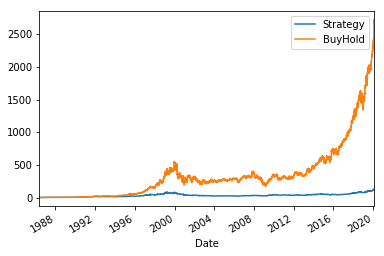

In [34]:
df[["Strategy","BuyHold"]].plot()